# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
time.strftime('%Y-%m-%d')

'2023-12-11'

In [5]:
# Set the API base URL
# url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.ctime(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kailua-kona
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | tromso
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | hamilton
Processing Record 9 of Set 1 | pisco
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | enewetak
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | aitape
Processing Record 16 of Set 1 | lido di ostia
Processing Record 17 of Set 1 | urangan
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | mathba
Processing Record 20 of Set 1 | luang prabang
Processing Record 21 of Set 1 | mandvi
Processing Record 22 of Set 1 | stanley
Processing Rec

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [7]:
# Display sample data
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kailua-kona,19.6406,-155.9956,80.51,78,40,3.44,US,Mon Dec 11 13:49:09 2023
1,grytviken,-54.2811,-36.5092,39.99,76,96,12.46,GS,Mon Dec 11 13:49:10 2023
2,bethel,41.3712,-73.4140,43.52,74,100,5.75,US,Mon Dec 11 13:49:10 2023
3,tromso,69.6496,18.9570,26.62,80,75,9.22,NO,Mon Dec 11 13:49:11 2023
4,albany,42.6001,-73.9662,40.37,75,10,11.01,US,Mon Dec 11 13:45:44 2023


In [8]:
# Export the City_Data into a csv
city_data_pd.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kailua-kona,19.6406,-155.9956,80.51,78,40,3.44,US,Mon Dec 11 13:49:09 2023
1,grytviken,-54.2811,-36.5092,39.99,76,96,12.46,GS,Mon Dec 11 13:49:10 2023
2,bethel,41.3712,-73.4140,43.52,74,100,5.75,US,Mon Dec 11 13:49:10 2023
3,tromso,69.6496,18.9570,26.62,80,75,9.22,NO,Mon Dec 11 13:49:11 2023
4,albany,42.6001,-73.9662,40.37,75,10,11.01,US,Mon Dec 11 13:45:44 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

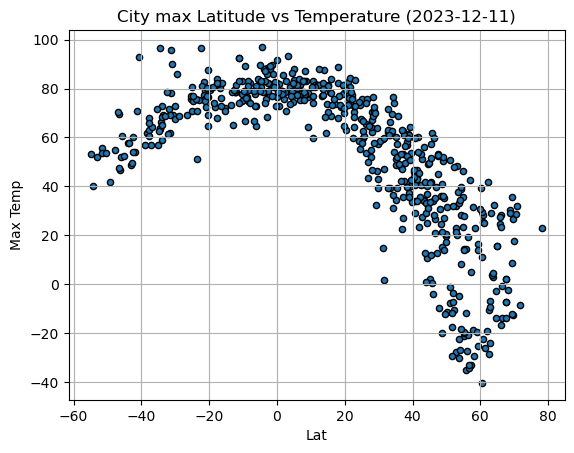

In [10]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
city_data_df.plot.scatter("Lat","Max Temp",grid=True,edgecolor="black",
                          title=f"City max Latitude vs Temperature ({time.strftime('%Y-%m-%d')})")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

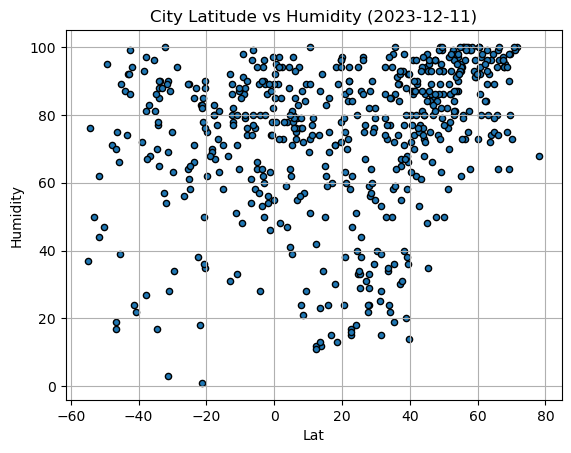

In [11]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot.scatter("Lat","Humidity",grid=True,edgecolor="black",
                          title=f"City Latitude vs Humidity ({time.strftime('%Y-%m-%d')})")




# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

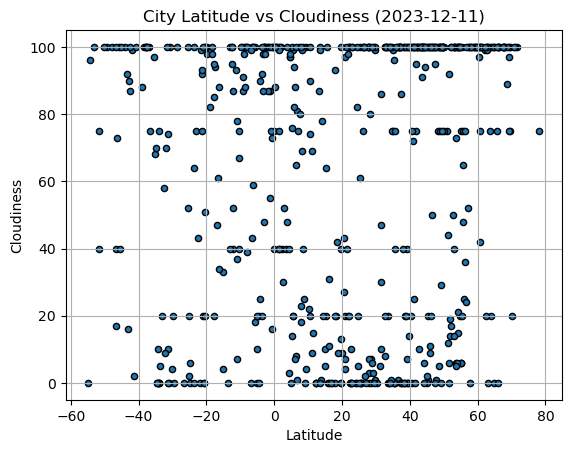

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot.scatter("Lat","Cloudiness",grid=True,edgecolor="black",
                          title=f"City Latitude vs Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')



# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

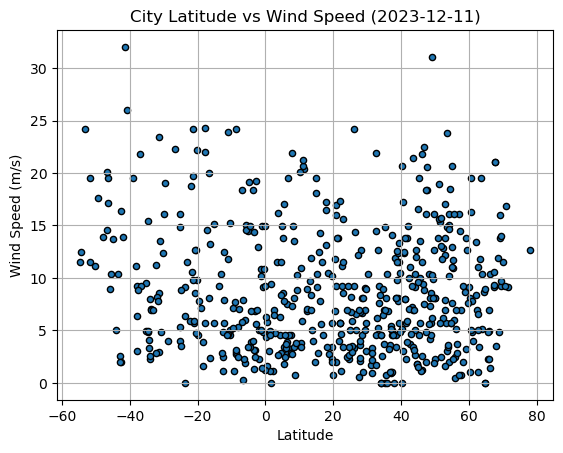

In [13]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
city_data_df.plot.scatter("Lat","Wind Speed",grid=True,edgecolor="black",
                          title=f"City Latitude vs Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
#x_values = city_data_df['Lat']
# y_values = city_data_df['Max Temp']

def calculate_linear_regression(x_values,y_values,coords,pic_title,y_axis):

# Find best fit regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plotting best fit line 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # Write down the what the line equation is
    plt.annotate(line_eq,coords,fontsize=15,color="red")
    plt.title(pic_title)
    plt.xlabel('Latitude')
    plt.ylabel(y_axis)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kailua-kona,19.6406,-155.9956,80.51,78,40,3.44,US,Mon Dec 11 13:49:09 2023
2,bethel,41.3712,-73.4140,43.52,74,100,5.75,US,Mon Dec 11 13:49:10 2023
3,tromso,69.6496,18.9570,26.62,80,75,9.22,NO,Mon Dec 11 13:49:11 2023
4,albany,42.6001,-73.9662,40.37,75,10,11.01,US,Mon Dec 11 13:45:44 2023
6,tiksi,71.6872,128.8694,-8.39,100,100,9.13,RU,Mon Dec 11 13:49:12 2023


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,39.99,76,96,12.46,GS,Mon Dec 11 13:49:10 2023
5,adamstown,-25.0660,-130.1015,70.61,61,2,5.35,PN,Mon Dec 11 13:49:12 2023
8,pisco,-13.7000,-76.2167,73.45,68,0,9.22,PE,Mon Dec 11 13:49:13 2023
10,port-aux-francais,-49.3500,70.2167,41.58,95,100,17.65,TF,Mon Dec 11 13:49:14 2023
11,waitangi,-43.9535,-176.5597,57.81,87,100,5.01,NZ,Mon Dec 11 13:49:14 2023


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6886413589430891


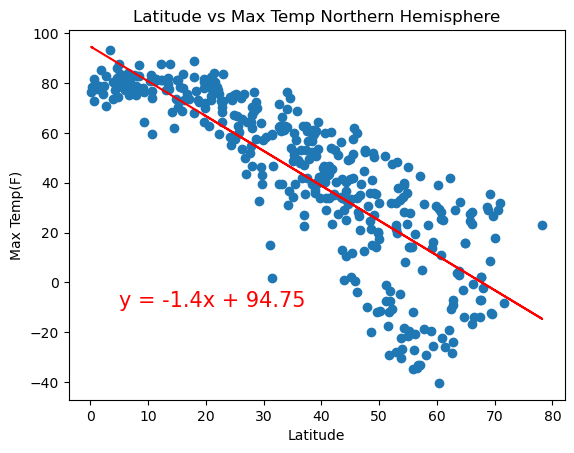

In [35]:
calculate_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],(5,-10),"Latitude vs Max Temp Northern Hemisphere","Max Temp(F)")

The r-squared is: 0.5093498320732762


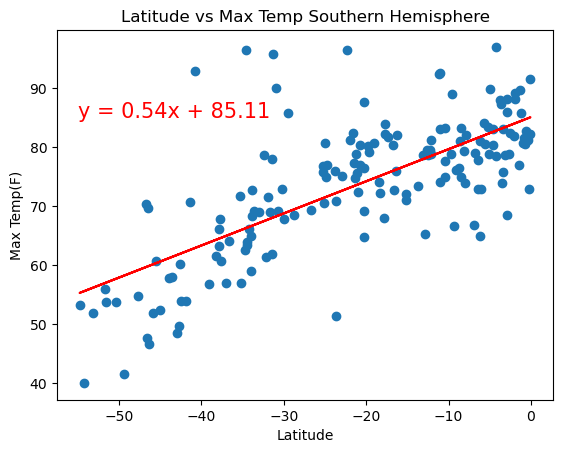

In [36]:
# Linear regression on Southern Hemisphere
calculate_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],(-55,85),"Latitude vs Max Temp Southern Hemisphere","Max Temp(F)")

**Discussion about the linear relationship:** In the Southern Hemisphere the temperature appears to go up as you get closer to the equator with a ~0.509 moderate correlation and the same is true in the northern hemisphere with a stronger ~0.688 correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.13016213795100975


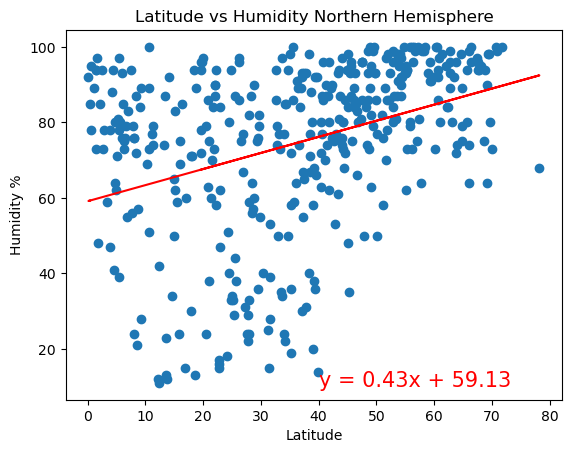

In [37]:
# Northern Hemisphere
calculate_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],(40,10),"Latitude vs Humidity Northern Hemisphere","Humidity %")

The r-squared is: 0.022574216518482706


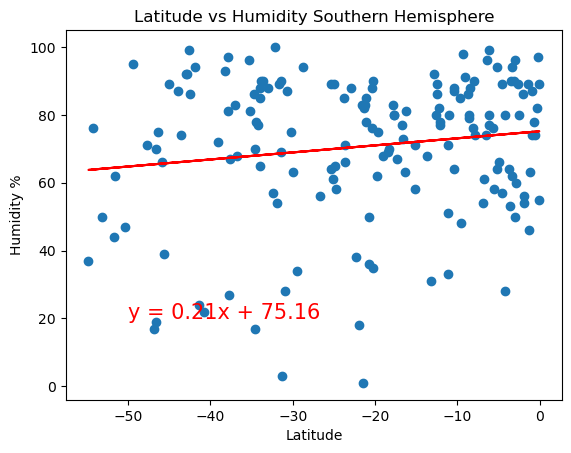

In [38]:
# Southern Hemisphere
calculate_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],(-50,20),"Latitude vs Humidity Southern Hemisphere","Humidity %")

**Discussion about the linear relationship:** The regression does not display a correlation between latitude and humidity in this data.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05172166987037357


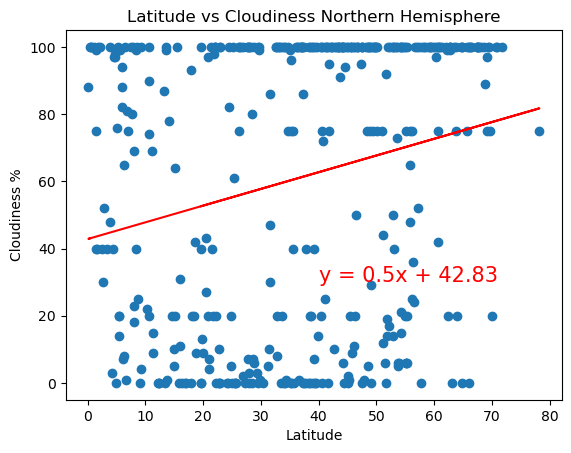

In [40]:
# Northern Hemisphere
calculate_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],(40,30),"Latitude vs Cloudiness Northern Hemisphere","Cloudiness %")


The r-squared is: 0.007373442462462978


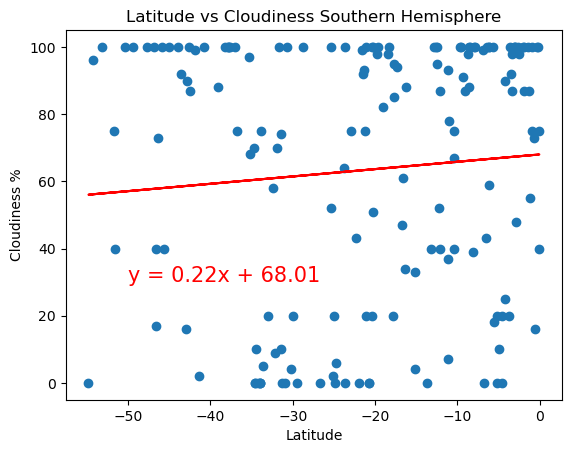

In [42]:
# Southern Hemisphere
calculate_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],(-50,30),"Latitude vs Cloudiness Southern Hemisphere","Cloudiness %")

**Discussion about the linear relationship:** The regression does not display a correlation between latitude and cloudiness in this data.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.013500275125306996


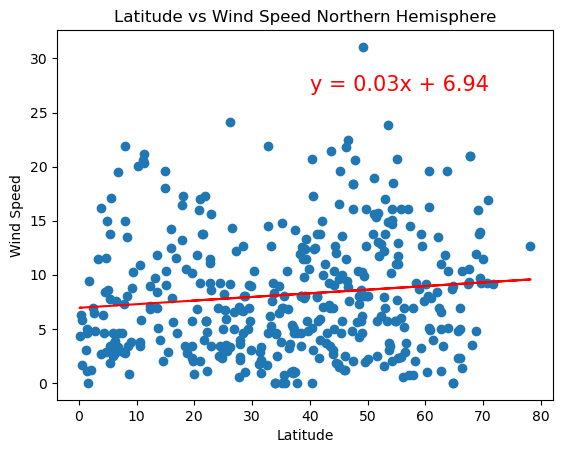

In [44]:
# Northern Hemisphere
calculate_linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],(40,27),"Latitude vs Wind Speed Northern Hemisphere","Wind Speed")

The r-squared is: 0.06159233775581363


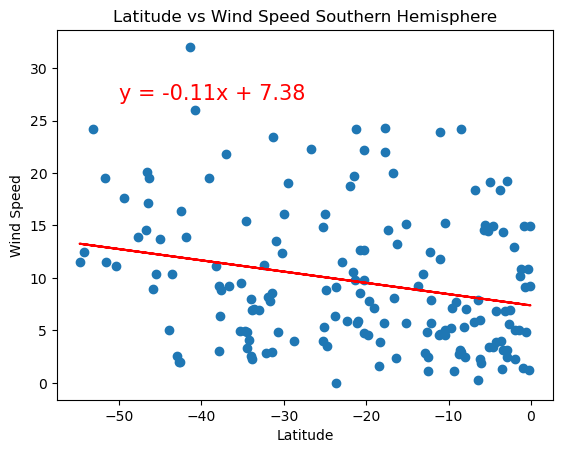

In [46]:
# Southern Hemisphere
calculate_linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],(-50,27),"Latitude vs Wind Speed Southern Hemisphere","Wind Speed")

**Discussion about the linear relationship:** The regression does not display a correlation between latitude and wind speed in this data.